In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [31]:
with open('times_stt') as f:
    stt_times = json.load(f)
stt_no = [l for l in stt_times if l["transcribed"] == False]
stt_yes = [l for l in stt_times if l["transcribed"] == True]
    
with open('times_llm') as f:
    llm_times = json.load(f)
llm_format = [l for l in llm_times if l["reason"] == "format"]
llm_input = [l  for l in llm_times if l["reason"] == "input"]
llm_generation = [l  for l in llm_times if l["reason"] == "generating"]
    
with open('times_start') as f:
    start_times = json.load(f)

with open('times_interrupt') as f:
    interrupt_times = json.load(f)

with open('times_tts') as f:
    tts_times = json.load(f)

In [32]:
def get_latencies(obs):
    return [o["end"] - o["start"] for o in obs]
    

In [33]:
def plot(start_t = None, end_t = None):
    plt.figure(figsize=(16, 8))

    colors = ['lightgray', 'skyblue', 'gray', 'skyblue', 'lightgreen', 'purple']
    y_pos = [1,1, 2,2,2, 3]
    list_objects = [stt_no, stt_yes, llm_format, llm_input, llm_generation, tts_times]

    if start_t is not None:
        for i in range(len(list_objects)):
            list_objects[i] = [o for o in list_objects[i] if o["start"]>start_t and o["start"]<end_t]
        start_times_filtered = [s for s in start_times if s["start"]>start_t and s["start"]<end_t]
        interrupt_times_filtered = [i for i in interrupt_times if i["start"]>start_t and i["start"]<end_t]
    else:
        start_times_filtered = start_times
        interrupt_times_filtered = interrupt_times
    
    for i in range(len(list_objects)):
    
        objects = list_objects[i]
    
        starts = [obj['start'] for obj in objects]
        stops = [obj['end'] for obj in objects]
        lengths = [stop - start for start, stop in zip(starts, stops)]
        y_positions = [y_pos[i] for _ in range(len(objects))]
        
        # Create the plot
        
        # Plot first list of objects
        plt.barh(y_positions, lengths, left=starts, color=colors[i], edgecolor="darkgray")
        
        
        
    plt.xlabel('Time (s)')
    plt.ylabel('Inference')
    plt.title('Horizontal Bars Representing Objects')
    
    
    plt.yticks([1,2, 3], ["STT", "LLM", "TTS"])
    
    lines =  [s['start'] for s in start_times_filtered]
    for l in lines:
        plt.axvline(x=l, color='red', linestyle='-', linewidth=2)
    
    lines =  [i['start'] for i in interrupt_times_filtered]
    for l in lines:
        plt.axvline(x=l, color='orange', linestyle='-', linewidth=2)
    
    plt.show()
    

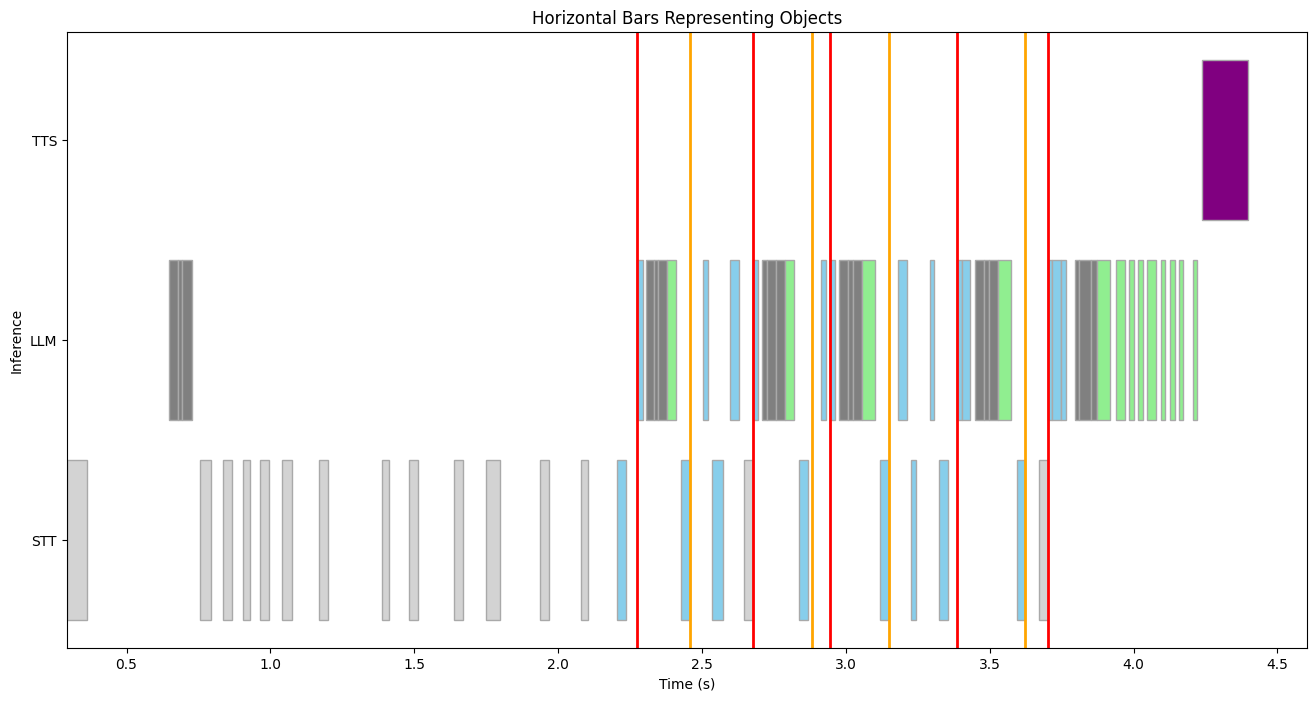

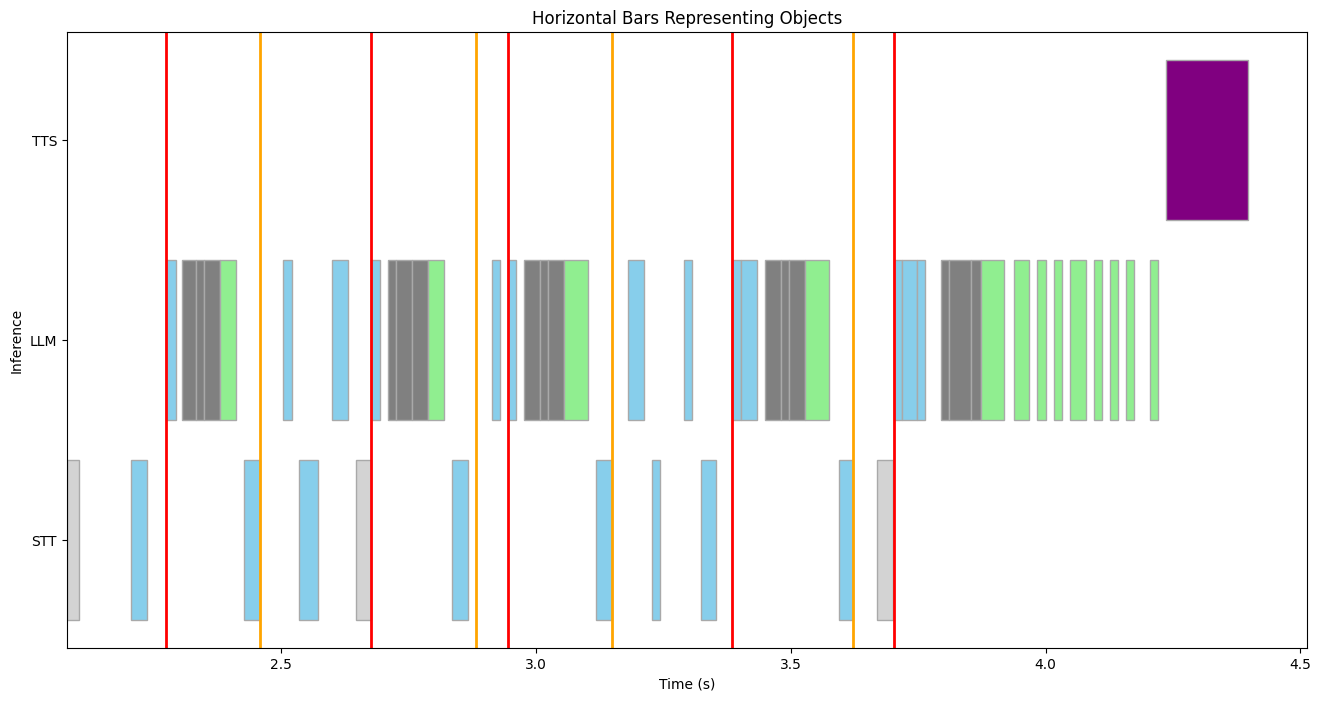

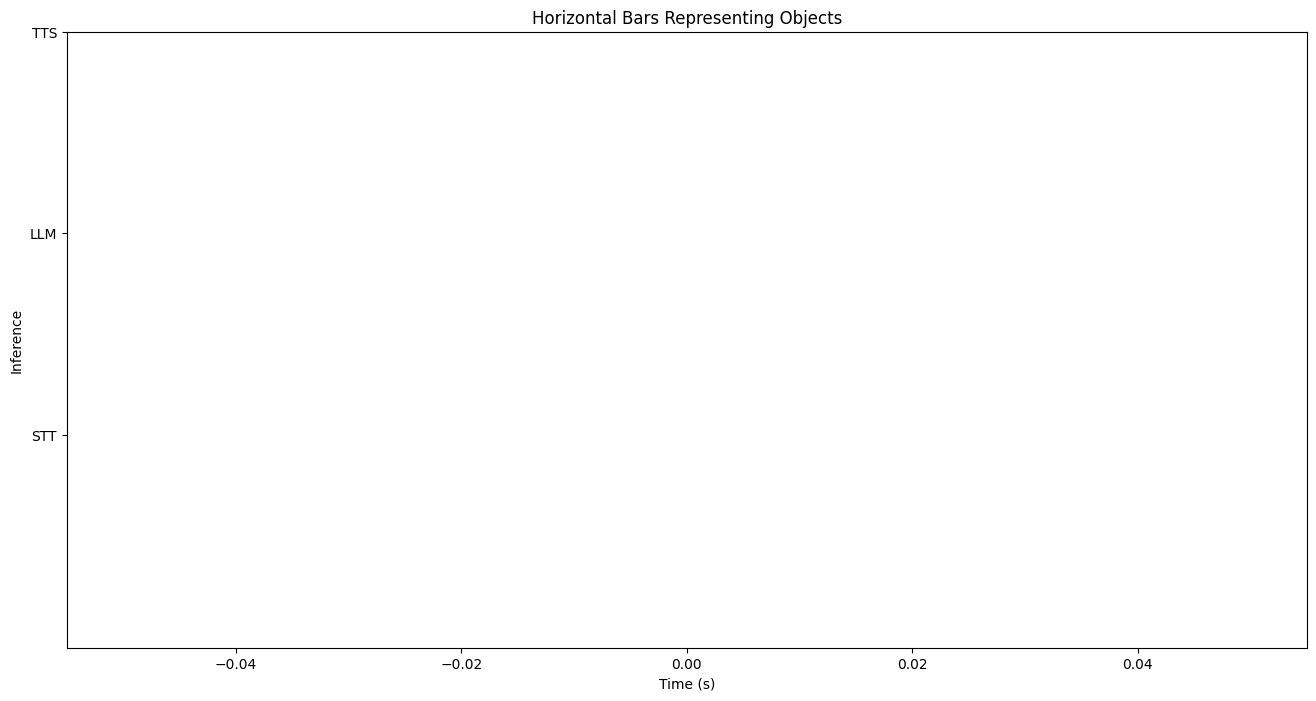

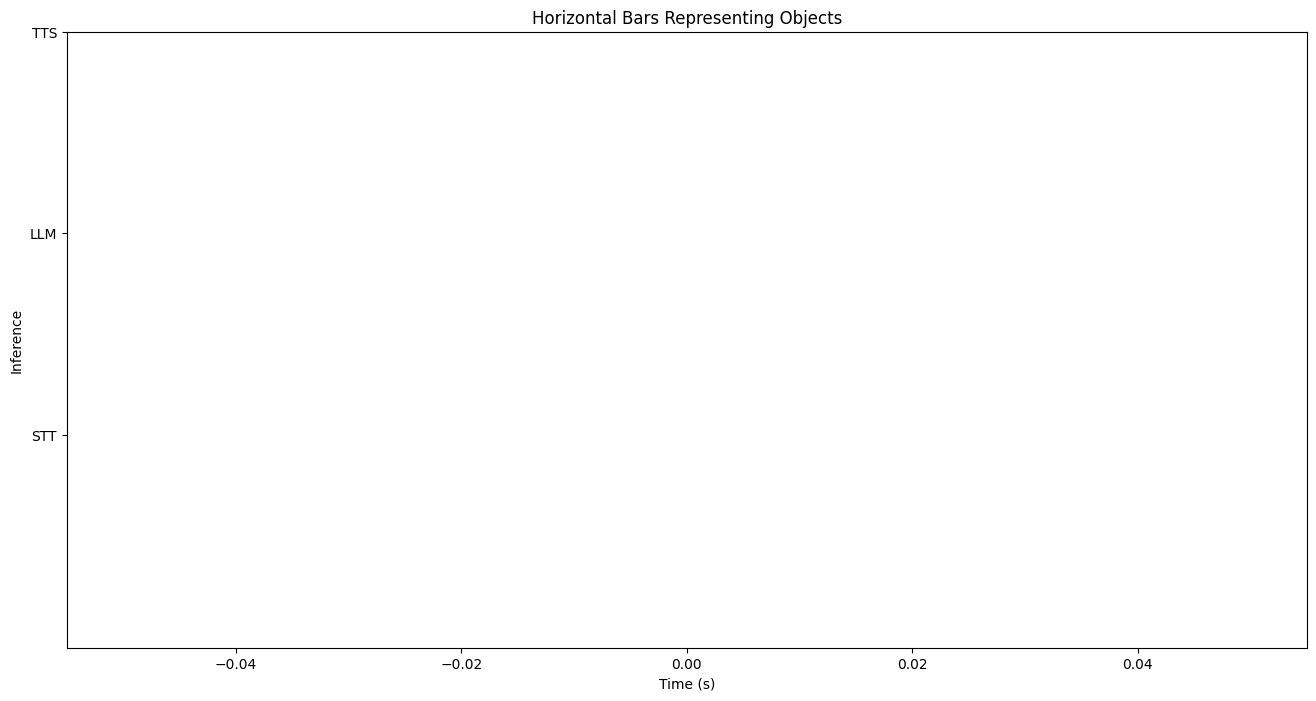

In [35]:
plot()
plot(start_t = 2, end_t = 5)
plot(start_t = 11, end_t = 14)
plot(start_t = 18, end_t = 21)

In [36]:
print("\n\n ####### STT #######")
lat_stt = get_latencies(stt_times)
print("  Min: ", round(np.min(lat_stt)*1000,1), "ms")
print("  Max: ", round(np.max(lat_stt)*1000,1), "ms")
print("  Mean: ", round(np.mean(lat_stt)*1000,1), "ms")

print("\n\n ####### LLM #######")
lat_llm = get_latencies(llm_times)
print("  Min: ", round(np.min(lat_llm)*1000,1), "ms")
print("  Max: ", round(np.max(lat_llm)*1000,1), "ms")
print("  Mean: ", round(np.mean(lat_llm)*1000,1), "ms")

print("\n\n ####### TTS #######")
lat_tts = get_latencies(tts_times)
print("  Min: ", round(np.min(lat_tts)*1000,1), "ms")
print("  Max: ", round(np.max(lat_tts)*1000,1), "ms")
print("  Mean: ", round(np.mean(lat_tts)*1000,1), "ms")



 ####### STT #######
  Min:  15.9 ms
  Max:  69.6 ms
  Mean:  32.6 ms


 ####### LLM #######
  Min:  13.5 ms
  Max:  243.8 ms
  Mean:  26.4 ms


 ####### TTS #######
  Min:  160.2 ms
  Max:  160.2 ms
  Mean:  160.2 ms


In [56]:
print("\n\n ####### STT #######")
lat_stt = get_latencies(stt_times)
print("  Min: ", round(np.min(lat_stt)*1000,1), "ms")
print("  Max: ", round(np.max(lat_stt)*1000,1), "ms")
print("  Mean: ", round(np.mean(lat_stt)*1000,1), "ms")

print("\n\n ####### LLM #######")
lat_llm = get_latencies(llm_times)
print("  Min: ", round(np.min(lat_llm)*1000,1), "ms")
print("  Max: ", round(np.max(lat_llm)*1000,1), "ms")
print("  Mean: ", round(np.mean(lat_llm)*1000,1), "ms")

print("\n\n ####### TTS #######")
lat_tts = get_latencies(tts_times)
print("  Min: ", round(np.min(lat_tts)*1000,1), "ms")
print("  Max: ", round(np.max(lat_tts)*1000,1), "ms")
print("  Mean: ", round(np.mean(lat_tts)*1000,1), "ms")



 ####### STT #######
  Min:  25.3 ms
  Max:  57.3 ms
  Mean:  41.7 ms


 ####### LLM #######
  Min:  21.7 ms
  Max:  242.5 ms
  Mean:  39.5 ms


 ####### TTS #######
  Min:  144.2 ms
  Max:  185.3 ms
  Mean:  166.7 ms
